#Resource

https://stackoverflow.com/questions/61901365/modulenotfounderror-no-module-named-sklearn-externals-six

https://stackoverflow.com/questions/28312534/graphvizs-executables-are-not-found-python-3-4

https://mljar.com/blog/visualize-decision-tree/


# A graphical example

In [1]:
# %pip install sklearn
# %pip install mglearn
# %brew install graphviz

In [33]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [34]:
import numpy as np
from matplotlib import pyplot
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define the features and labels
features = X[:, :2]  # Using the first two features for the example
labels = y

# Some functions to plot data and models
def plot_points(features, labels, size_of_points=100):
    X = np.array(features)
    y = np.array(labels)
    class1 = X[np.argwhere(y == 0)]
    class2 = X[np.argwhere(y == 1)]
    class3 = X[np.argwhere(y == 2)]
    pyplot.scatter([s[0][0] for s in class1],
                   [s[0][1] for s in class1],
                   s=size_of_points,
                   color='red',
                   edgecolor='k',
                   marker='^')
    pyplot.scatter([s[0][0] for s in class2],
                   [s[0][1] for s in class2],
                   s=size_of_points,
                   color='green',
                   edgecolor='k',
                   marker='s')
    pyplot.scatter([s[0][0] for s in class3],
                   [s[0][1] for s in class3],
                   s=size_of_points,
                   color='blue',
                   edgecolor='k',
                   marker='o')

def plot_model(X, y, model, size_of_points=100):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    pyplot.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1, 3))
    pyplot.contour(xx, yy, Z, colors='k', linewidths=1)
    plot_points(X, y, size_of_points)
    pyplot.show()

def display_tree(tree, feature_names):
    left = tree.children_left
    right = tree.children_right
    threshold = tree.threshold
    features = [feature_names[i] for i in tree.feature]

    for i in range(tree.node_count):
        if left[i] == right[i]:  # leaf node
            print(f"Leaf node, class {np.argmax(tree.value[i])}")
        else:
            print(f"Decision node, feature: {features[i]}, threshold: {threshold[i]}")
            
# Create and display the decision tree rules
#dt = DecisionTreeClassifier()
#dt.fit(X[:, :2], y)
#display_tree(dt.tree_, feature_names=iris.feature_names)

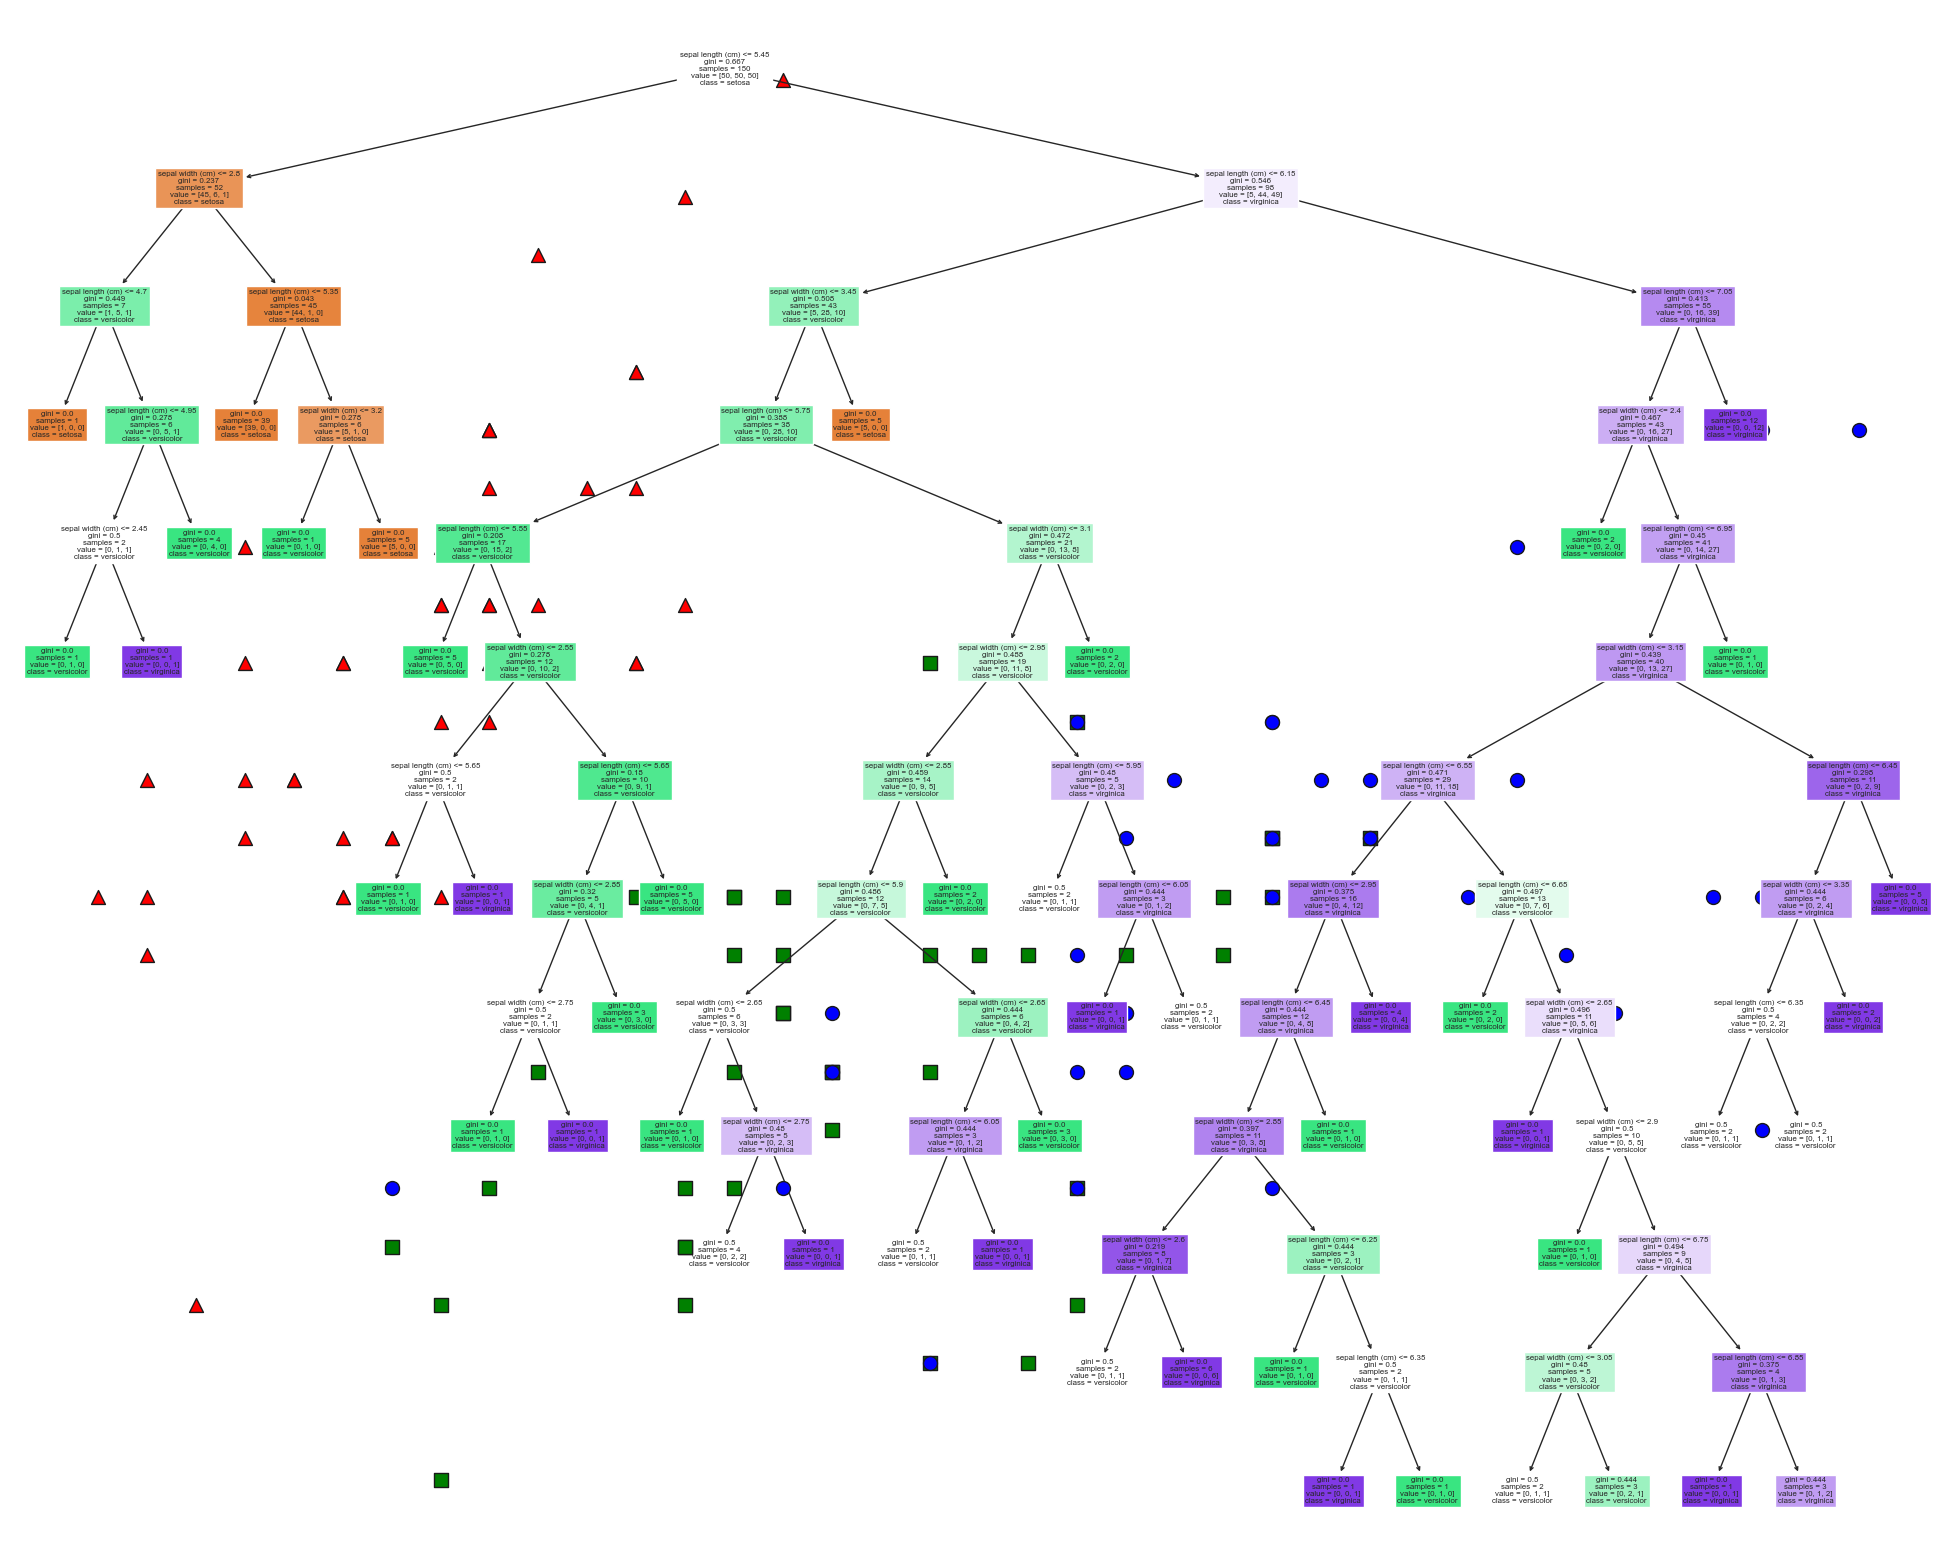

In [35]:
plot_points(features, labels)
pyplot.show()

# Building a decision tree using Gini index

In [29]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(features, labels)
decision_tree.score(features, labels)

0.9266666666666666

In [30]:
from sklearn import tree
text_representation = tree.export_text(decision_tree)
print(text_representation)

|--- feature_0 <= 5.45
|   |--- feature_1 <= 2.80
|   |   |--- feature_0 <= 4.70
|   |   |   |--- class: 0
|   |   |--- feature_0 >  4.70
|   |   |   |--- feature_0 <= 4.95
|   |   |   |   |--- feature_1 <= 2.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  2.45
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  4.95
|   |   |   |   |--- class: 1
|   |--- feature_1 >  2.80
|   |   |--- feature_0 <= 5.35
|   |   |   |--- class: 0
|   |   |--- feature_0 >  5.35
|   |   |   |--- feature_1 <= 3.20
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  3.20
|   |   |   |   |--- class: 0
|--- feature_0 >  5.45
|   |--- feature_0 <= 6.15
|   |   |--- feature_1 <= 3.45
|   |   |   |--- feature_0 <= 5.75
|   |   |   |   |--- feature_0 <= 5.55
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  5.55
|   |   |   |   |   |--- feature_1 <= 2.55
|   |   |   |   |   |   |--- feature_0 <= 5.65
|   |   |   |   |   |   |   |--- class: 1
|   |   |  

In [36]:
from sklearn import tree
text_representation = tree.export_text(decision_tree)
print(text_representation)

|--- feature_0 <= 5.45
|   |--- feature_1 <= 2.80
|   |   |--- feature_0 <= 4.70
|   |   |   |--- class: 0
|   |   |--- feature_0 >  4.70
|   |   |   |--- feature_0 <= 4.95
|   |   |   |   |--- feature_1 <= 2.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  2.45
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  4.95
|   |   |   |   |--- class: 1
|   |--- feature_1 >  2.80
|   |   |--- feature_0 <= 5.35
|   |   |   |--- class: 0
|   |   |--- feature_0 >  5.35
|   |   |   |--- feature_1 <= 3.20
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  3.20
|   |   |   |   |--- class: 0
|--- feature_0 >  5.45
|   |--- feature_0 <= 6.15
|   |   |--- feature_1 <= 3.45
|   |   |   |--- feature_0 <= 5.75
|   |   |   |   |--- feature_0 <= 5.55
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  5.55
|   |   |   |   |   |--- feature_1 <= 2.55
|   |   |   |   |   |   |--- feature_0 <= 5.65
|   |   |   |   |   |   |   |--- class: 1
|   |   |  

<Figure size 1200x600 with 0 Axes>

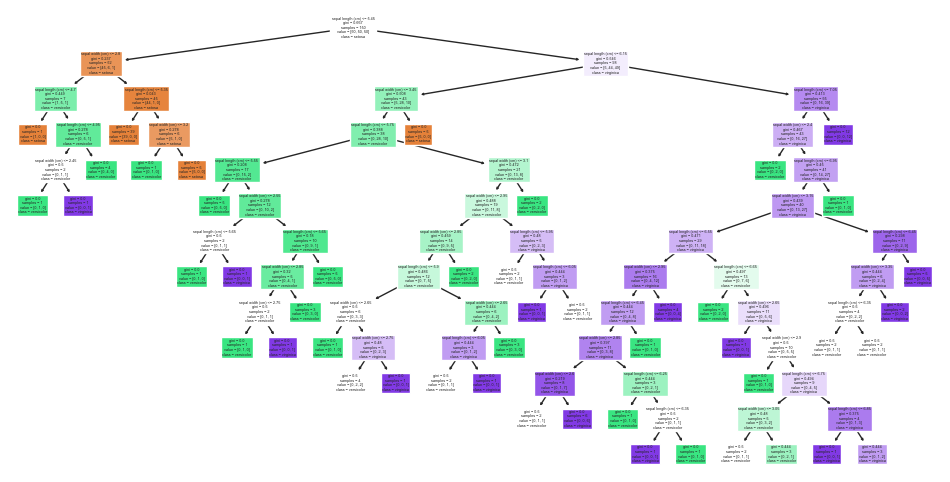

In [38]:
# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plot_tree(decision_tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

# Building a decision tree using entropy

In [39]:
decision_tree_entropy = DecisionTreeClassifier(criterion='entropy')
decision_tree_entropy.fit(features, labels)
decision_tree_entropy.score(features, labels)

0.9266666666666666

In [44]:
# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plot_tree(decision_tree_entropy, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)

[Text(0.42873475609756095, 0.96875, 'sepal length (cm) <= 5.55\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.12195121951219512, 0.90625, 'sepal width (cm) <= 2.8\nentropy = 0.813\nsamples = 59\nvalue = [47, 11, 1]\nclass = setosa'),
 Text(0.07317073170731707, 0.84375, 'sepal length (cm) <= 4.95\nentropy = 0.817\nsamples = 12\nvalue = [1, 10, 1]\nclass = versicolor'),
 Text(0.04878048780487805, 0.78125, 'sepal width (cm) <= 2.35\nentropy = 1.585\nsamples = 3\nvalue = [1, 1, 1]\nclass = setosa'),
 Text(0.024390243902439025, 0.71875, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = setosa'),
 Text(0.07317073170731707, 0.71875, 'sepal width (cm) <= 2.45\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.04878048780487805, 0.65625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.0975609756097561, 0.65625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.097560975609

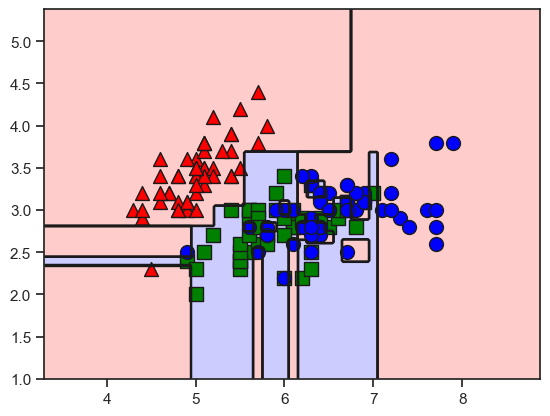

In [41]:
plot_model(features, labels, decision_tree_entropy)

# Building a decision tree of depth one (a vertical or horizontal line)

In [ ]:
decision_tree_depth_1 = DecisionTreeClassifier(max_depth=1)
decision_tree_depth_1.fit(features, labels)
decision_tree_depth_1.score(features, labels)
plot_model(features, labels, decision_tree_depth_1)

In [ ]:
display_tree(decision_tree_depth_1)

In [ ]:
decision_tree_depth_2 = DecisionTreeClassifier(max_depth=2)
decision_tree_depth_2.fit(features, labels)
decision_tree_depth_2.score(features, labels)
plot_model(features, labels, decision_tree_depth_2)

In [ ]:
display_tree(decision_tree_depth_2)